# IA369Z - Reprodutibilidade em Pesquisa Computacional.

Douglas Vinicius Esteves

## Consumo de energia para dispositivos de Internet das Coisas (IoT).

Dentro do conceito de pesquisas com reprodutibilidade, foi elaborado um formato de coletar informações para avaliações de consumo de energia que podem ser usado para diversas arquitetura de microcontroladores com módulos de comunicações sem fio, utilizado atualmente em desenvolvimento de dispositivos de Internet das Coisas. Durante esse processo utilizei apenas um módulo chamado ESP8266[1] versão 1.0 desenvolvido pela empresa Specific[2]. 

Durante essa pesquisa descrevo diversos recursos e plataformas utilizadas em diferentes etapas desde coleta de informações, comunicações e armazenamento dos dados coletados pelo dispositivo. Com preocupação de disponibilizar no formato mais aberto possível, para receber colaborações melhorias ou até mesmo substituições de software por outra ferramentas que podem ser de melhor aproveito para desempenho ou entendimento, cito como principal delas a utilização de uma plataforma de código aberto para coleta de informações de dispositivos e publicação de forma online, com gráficos dinâmica e informações abertos, capaz de exportar as informações em diferentes formatos de arquivos. usei a plataforma thingspeak. 

Caso de uso escolhido foi um protótipo de Campainha instalado no Laboratório Hacker de Campinas, um espaço aberto ao público que funcionar de forma independente e  colaborativa por pessoas que ajudam a manter o local com diversas opções de colaboração.


## Workflow

<img src="../figures/workflow02.png" />
<em>/figures/workflow02.png</em>

Na etapa de avaliação das informações utilizaremos apenas a área laranja do workflow, porém está totalmente aberto e com descrições para edições e desenvolvimento os arquivos citados nas etapas do workflow, utilizei apenas um protótipo mas ideia é que outros pesquisadores utilizem mais arquitetura com o mesmo formato de aplicação assim conseguiremos criar mais gráficos com comparações de diferentes arquiteturas em prototipação para desenvolvimento de dispositivos de Internet das Coisas.


## Device "Dispositivo IoT"

Esse dispositivo é parte de um projeto de estudos no Hackerspace LHC situado em Campinas-SP, nomeado como Campainha IoT afim de estudos e testes com a arquitetura do módulo ESP8266 para acionar avisos sonoros dentro do Laboratório do Hackerspace de Campinas[3], utilizamos um modelo de circuito simples através de um acionamento via botão o hardware é alimentado por duas baterias AA  ligado o dispositivo, seu programa aciona os recursos de módulos de comunicação wifi conectando na rede local e acionando uma chamada ao equipamento na rede local, para execução de outra etapa do processo, após a confirmação da comunicação o dispositivo é desligado e só consegue ser ativado novamente através de um acionamento manual via botão.

Dispositivo utiliza de diversos recursos como :

<img src="../figures/circuitocampainha.png" />

Bateria, forma de alimentar o dispositivo. 
ESP8266, Um chip de baixo custo implementado a pilha de TCP/IP e com um microcontrolador fabricado pela empresa Chinesa Espressif systems.
Switch : Interface Homem máquina, acionamento para ativação do device, caixa da Campainha e circuito para isolar o dispositivo contra água e proteger o dispositivo.
Programa LUA : Programa com controle do device e execução de funções. 
Connection : Tratamento com a conexão do device com o gateway local para envio de informações para plataforma online e ativação de sinal no local.

<img src="../figures/campainha-iot-1.jpg" />
<img src="../figures/campainha-iot-2.jpg" />

## Gateway   "Ponte e Equipamento local de comunicação"

Equipamento usado para executar a comunicação e tratamentos de informações com os dispositivos locais, rodando um programa em python chamado server.py que tem como principal atividade indexar dados coletados na plataforma thingspeak. atenção para configurar corretamente um ip ao equipamento onde consiga realizar a comunicação com a rede local. 

Esse gateway pode ser usado para simular apenas como um equipamento local, rodando de preferência uma distribuição linux Ubuntu, para outras distribuições podem ter problemas com bibliotecas, necessita também ter uma caixa de som para executar a saída de áudio para execução dos processos do programa servidor.py.



## Thingspeak "Plataforma online com informações coletadas" 

Plataforma Open Source[4] para análise da Internet das Coisas, contém recursos como registrar dados coletados por devices e através de telas e exibições de gráficos dinâmicos. Por ser uma plataforma de código aberto existem diversos recursos que podem ser usado por essa plataforma. Com possibilidade de exportar as informações coletadas através em formatos de arquivos JSON e CSV. Existe uma integração com a plataforma da MATLAB voltada para Internet das Coisas mas não estou usando esse recurso. Os dados são coletados e processados em nuvem, suas informações são registradas através de canais onde criadas em formas de perfis para acesso público ou fechadas de forma restritiva conforme sua necessidade. O thingspeak disponibiliza formas de compartilhar essas informações que geralmente são usadas gráficos dinâmica para exibir os valores coletados por sensores[5]. Outro recurso diferenciado nesta dessa plataforma é a possibilidade de criar um mecanismo de retorno “talkback” para retornar comandos ou avisos ao sistema que podem conter alguns tratamentos específicos ajudando em possíveis alarmes, alertas ou tratamento de falhas. Neste experimento as informações registradas são data e hora de acionamento, numero registrado e total de tensão das baterias do equipamento. 

<img src="../figures/thinkspeak.png" />



## Código Fonte

Os códigos fontes estão disponíveis no seguinte [Notebook](../deliver/2017-06-12-estevesdouglas-codigos.ipynb)

## Data "Dados coletados"

Os dados dessa pesquisa, foram registrados através da plataforma thingspeak[6], exportei as informações e elas podem ser acessadas através do link fornecido, gerando novamente a base de informações, selecionei o formato CSV para trabalhar com importação junto com a ferramenta Jupyter notebook. estarei exibindo essas informações criando mais gráficos selecionando alguns informações do arquivo CSV.
Informações divulgadas no diretório data podem ser alterada e usada para testes, também pode ser confirmada direto no canal do [thingspeak original do projeto](https://thingspeak.com/channels/58985/). 

## Arquivos no diretório data

* [database2017.csv](../data/database2017.csv) Dados de 2017 atualizado em junho.

* [databaseoriginal.csv](../data/databaseoriginal.csv) Arquivo orginal com informações desde de 2015.

## Leitura de informações do arquivo CSV

São informado 3 tipos colunas de informações
Data e Hora de ativação
Registro de entrada
Tensão da bateria[7]


In [1]:
import numpy as np
import csv
with open('../data/database2017.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print ', '.join(row)

created_at,entry_id,field1
2017-01-06, 22:49:19, UTC,380,3238
2017-01-07, 14:31:19, UTC,381,3238
2017-01-07, 15:32:59, UTC,382,3234
2017-01-07, 17:33:27, UTC,383,3238
2017-01-07, 20:02:41, UTC,384,3230
2017-01-08, 16:04:56, UTC,385,3222
2017-01-08, 20:07:52, UTC,386,3211
2017-01-08, 21:49:05, UTC,387,3237
2017-01-08, 22:49:15, UTC,388,3238
2017-01-10, 20:37:57, UTC,389,3238
2017-01-10, 21:02:21, UTC,390,3238
2017-01-10, 21:08:35, UTC,391,3238
2017-01-10, 21:27:09, UTC,392,3237
2017-01-10, 21:30:44, UTC,393,3238
2017-01-10, 21:35:02, UTC,394,3236
2017-01-10, 21:51:12, UTC,395,3235
2017-01-11, 21:06:39, UTC,396,3236
2017-01-11, 21:25:03, UTC,397,3235
2017-01-12, 13:07:17, UTC,398,3231
2017-01-12, 13:07:51, UTC,399,3230
2017-01-12, 18:47:26, UTC,400,3230
2017-01-12, 18:48:13, UTC,401,3230
2017-01-12, 18:49:18, UTC,402,3230
2017-01-12, 20:56:32, UTC,403,3230
2017-01-14, 11:15:14, UTC,404,3226
2017-01-14, 11:15:42, UTC,405,3226
2017-01-22, 22:19:29, UTC,406,3206
2017-01-23, 21:13:22, UTC,40

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

u'0.19.2'

In [3]:
%matplotlib inline


### Leitura dos últimos 30 registros

Uma observação que ficamos alguns meses sem usar a campainha porque o gateway estava quebrado e devida a alteração na sala.

Sem registros do dia 04/02/2017 ao dia 09/06/2017.

In [22]:
totallast30 = total.sort_values(by='created_at',ascending=False)[:30]


Faço a leitura dos últimos 30 registros no arquivo para mostrar em gráfico a evolução do consumo da bateria. pode ser notado que fiquei alguns meses sem coletar informações da campainha por problema técnico com o gateway. mesmo retornando o equipamento verifiquei que está bem baixo o consumo do dispositivo.

Sem registros do dia 04/02/2017 ao dia 09/06/2017.

Seleção dos últimos 30 registro no arquivo CSV.


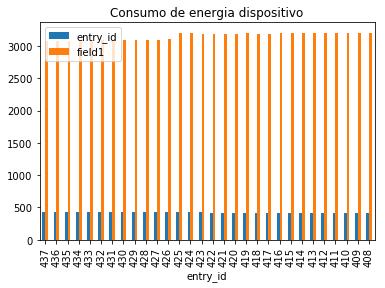

In [23]:
totallast30.plot(kind="bar", x=totallast30["entry_id"],
                   title="Consumo de energia dispositivo",
                   legend=True)

#### entry_id : Número de registro
#### field1 : Tensão da bateria.

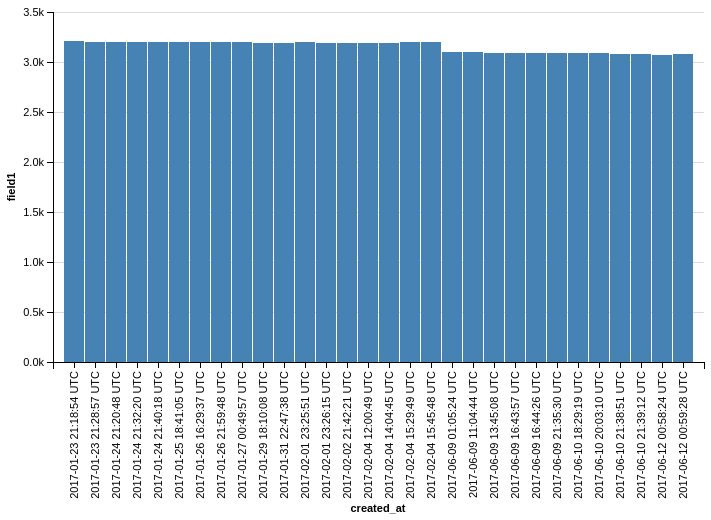

In [24]:
Chart(totallast30).mark_bar().encode(x='created_at', y='field1')


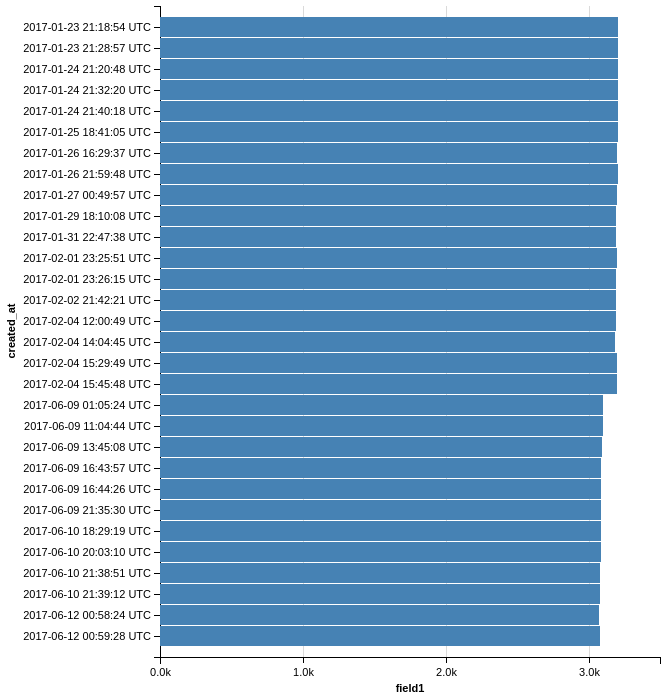

In [25]:
Chart(totallast30).mark_bar().encode(y='created_at', x='field1')


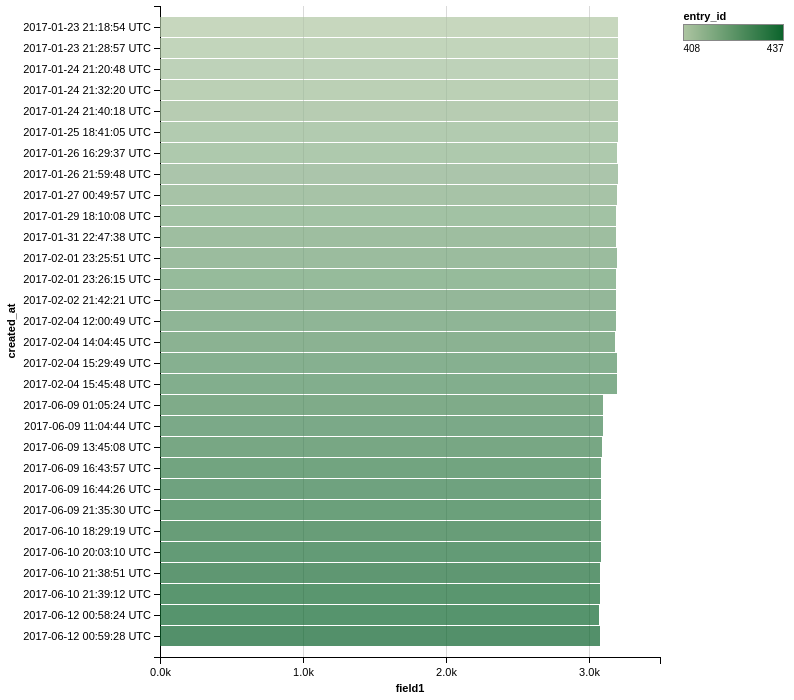

In [26]:
Chart(totallast30).mark_bar().encode(
    x=X('field1'),
    y=Y('created_at'),
    color='entry_id')

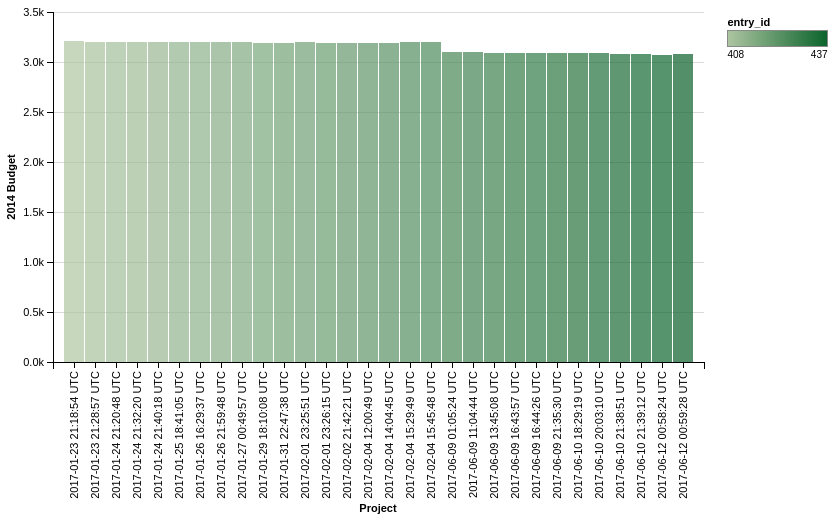

In [27]:
Chart(totallast30).mark_bar().encode(
    x=X('created_at:O',
        axis=Axis(title='Project')),
    y=Y('field1:Q',
        axis=Axis(title='2014 Budget')),
    color='entry_id')

Informações de leitura desse gráfico geradas no ano de 2017 . 

Foram 58 registros de ativações e conexões com a rede local via o módulo de Wifi.

### Tensão no início de ano : 3238 mV

### Tensão no registro 58 : 3081 mV

### Total de consumo : 157 mV


## Método

Utilização da arquitetura do módulo ESP8266, armazenando informações na plataforma Thingspeak, utilizando jupyter notebook para ler arquivos exportados em formato CSV, gerando gráficos e centralizando todos os dados e informações na plataforma do Github.

Hardware testado[8].

## Resultado

A Utilização dos recursos citados, podem ser utilizados versionando e controlando os dados coletados e versão de software utilizadas para comparar partes das arquiteturas.
Próxima etapa é gerar o experimento semelhante com outras arquitetura para gerar gráficos e criar comparações de consumo por utilização e durabilidade de marcas e tipos de baterias.


## Reference

[[1]ESP8266EX Datasheet](http://espressif.com/sites/default/files/documentation/0a-esp8266ex_datasheet_en.pdf)

[[2]Espressif](http://espressif.com/en)

[[3]LHC](https://lhc.net.br)

[[4]ThingSpeak](https://thingspeak.com/pages/learn_more)

[[5]Canal da Campainha IoT](https://thingspeak.com/channels/58985/)

[[6]Gráfico de consumo](https://thingspeak.com/channels/58985/charts/1?&median=15&results=60&dynamic=true&type=spline)

[7] Malvino, Edição revisada, Eletrônica volume 1. Página 3 Fontes de Tensão, MCGRAW-HILL 1987 Ano.

[[8]Prototype device](https://lhc.net.br/wiki/Campainha_IoT)